In [1]:
import pandas as pd

# Specify the file path or URL
file_path = 'tab_data.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


   clusterid - Prediction/OutPut companycode  ff_assets_curr  ff_curr_ratio  \
0                              5    B03YJQ-R       11.213000       0.829303   
1                              5    B03YJQ-R       14.463000       1.127280   
2                              3    B04MZH-R    13932.000000       1.539854   
3                              6    B04MZH-R    13932.000000       1.716865   
4                              3    B07C51-R       95.455576       1.007412   

     ff_debt  ff_debt_eq  ff_ebitda_oper  ff_inven_turn  ff_invest_cf  \
0  55.123000   92.488255       -2.755000      13.564401      1.919000   
1  53.431000   28.062500        3.663000      17.391083     -0.541000   
2   0.000000    0.000000        0.000000       6.013168      0.000000   
3   0.000000    0.000000        0.000000       6.090285      0.000000   
4  30.776546    2.043920       28.808719       6.068170     -7.426183   

   ff_ltd_com_eq  ff_oper_cf   ff_roce    ff_sales  
0      87.615772    4.926000 -0.1

In [2]:
import pandas as pd

# Step 1: Load the Data
file_path = 'tab_data.csv'  # Update this to the path of your CSV file
df = pd.read_csv(file_path)

# Step 2: Identify Missing Values
print("Missing values per column:")
print(df.isnull().sum())

# Step 3: Handle Missing Values
# Option A: Remove rows with any missing value
df_cleaned = df.dropna()

# Option B: Impute missing values (e.g., with the mean of the column)
# This is just an example for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Step 4 & 5: Check for and Handle Inconsistencies
# Example: Ensure all values in 'ff_assets_curr' are non-negative
df['ff_assets_curr'] = df['ff_assets_curr'].apply(lambda x: max(x, 0))

# Step 6: Verify Data Types
print("Data types after cleaning:")
print(df.dtypes)

# Display the first few rows to verify changes
print(df.head())

Missing values per column:
clusterid - Prediction/OutPut    0
companycode                      0
ff_assets_curr                   0
ff_curr_ratio                    0
ff_debt                          0
ff_debt_eq                       0
ff_ebitda_oper                   0
ff_inven_turn                    0
ff_invest_cf                     0
ff_ltd_com_eq                    0
ff_oper_cf                       0
ff_roce                          0
ff_sales                         0
dtype: int64
Data types after cleaning:
clusterid - Prediction/OutPut      int64
companycode                       object
ff_assets_curr                   float64
ff_curr_ratio                    float64
ff_debt                          float64
ff_debt_eq                       float64
ff_ebitda_oper                   float64
ff_inven_turn                    float64
ff_invest_cf                     float64
ff_ltd_com_eq                    float64
ff_oper_cf                       float64
ff_roce                    

In [4]:
import pandas as pd

# Step 1: Load the Data
file_path = 'tab_data.csv'  # Update this to the path of your CSV file
df = pd.read_csv(file_path)

# Step 2: Identify Missing Values
print("Missing values per column before cleaning:")
print(df.isnull().sum())

# Step 3: Handle Missing Values
# Option A: Remove rows with any missing value
df_cleaned = df.dropna()

# Option B: Impute missing values (e.g., with the mean of the column)
# This is just an example for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Check if there are any missing values left
print("Missing values per column after cleaning:")
print(df.isnull().sum())

# Step 4 & 5: Check for and Handle Inconsistencies
# Example: Ensure all values in 'ff_assets_curr' are non-negative
df['ff_assets_curr'] = df['ff_assets_curr'].apply(lambda x: max(x, 0))

# Step 6: Verify Data Types
print("Data types after cleaning:")
print(df.dtypes)

# Display the first few rows to verify changes
print(df.head())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'Cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

# Recommend further changes or cleaning if required
# This is a simple check for negative values in columns that should only have positive values
negative_value_columns = ['ff_assets_curr', 'ff_curr_ratio', 'ff_debt', 'ff_debt_eq', 'ff_ebitda_oper', 'ff_inven_turn', 'ff_invest_cf', 'ff_ltd_com_eq', 'ff_oper_cf', 'ff_roce', 'ff_sales']
for col in negative_value_columns:
    if (df[col] < 0).any():
        print(f"Column {col} contains negative values. Further investigation and cleaning may be required.")

# Check for any remaining inconsistencies or outliers
# This is a placeholder for any additional checks you might want to perform
# For example, you could check for outliers using standard deviation or IQR

Missing values per column before cleaning:
clusterid - Prediction/OutPut    0
companycode                      0
ff_assets_curr                   0
ff_curr_ratio                    0
ff_debt                          0
ff_debt_eq                       0
ff_ebitda_oper                   0
ff_inven_turn                    0
ff_invest_cf                     0
ff_ltd_com_eq                    0
ff_oper_cf                       0
ff_roce                          0
ff_sales                         0
dtype: int64
Missing values per column after cleaning:
clusterid - Prediction/OutPut    0
companycode                      0
ff_assets_curr                   0
ff_curr_ratio                    0
ff_debt                          0
ff_debt_eq                       0
ff_ebitda_oper                   0
ff_inven_turn                    0
ff_invest_cf                     0
ff_ltd_com_eq                    0
ff_oper_cf                       0
ff_roce                          0
ff_sales                   

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('tab_data.csv')

# Ensure that only numeric columns are considered for the quantile calculation
numeric_cols = df.select_dtypes(include=['number']).columns

# Outlier Detection and Handling
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to cap and floor the outliers
def cap_floor_outliers(value, q1, q3, iqr):
    if pd.isnull(value):
        return value  # Keep NaN values as is
    elif value < (q1 - 1.5 * iqr):
        return q1 - 1.5 * iqr
    elif value > (q3 + 1.5 * iqr):
        return q3 + 1.5 * iqr
    else:
        return value

# Apply the function to cap and floor outliers in the financial metrics columns
for col in numeric_cols:
    df[col] = df[col].apply(lambda x: cap_floor_outliers(x, Q1[col], Q3[col], IQR[col]))

# Feature Engineering
# Example: Create a new feature 'ff_assets_to_debt_ratio' as the ratio of 'ff_assets_curr' to 'ff_debt'
# Avoid division by zero by adding a small constant to the denominator
df['ff_assets_to_debt_ratio'] = df['ff_assets_curr'] / (df['ff_debt'] + 1e-4)

# Normalization/Standardization
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the feature columns (excluding 'clusterid - Prediction/OutPut' and 'companycode')
# Assuming 'clusterid - Prediction/OutPut' is the first column and 'companycode' is the second column
feature_cols = df.columns[2:-1]  # Exclude the last column if it's the newly created feature
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save the changes to a new CSV file
df.to_csv('Case1.csv', index=False)


Basic Statistics:
       clusterid - Prediction/OutPut  ff_assets_curr  ff_curr_ratio  \
count                    2476.000000     2476.000000    2476.000000   
mean                        4.339661     2511.071082       4.195220   
std                         1.500349    29121.490818      19.788324   
min                         1.000000        0.000000       0.000000   
25%                         3.000000       14.222353       1.252511   
50%                         4.000000       32.226000       1.716865   
75%                         6.000000       69.543061       2.089302   
max                         6.000000   743317.000000     569.458333   

             ff_debt   ff_debt_eq  ff_ebitda_oper  ff_inven_turn  \
count    2476.000000  2476.000000     2476.000000    2476.000000   
mean     1781.580860    -0.487029      228.155475      28.618812   
std     16760.095771    46.196460     1619.514358     235.597381   
min         0.000000 -2176.809104    -2005.515683       0.000000   
25

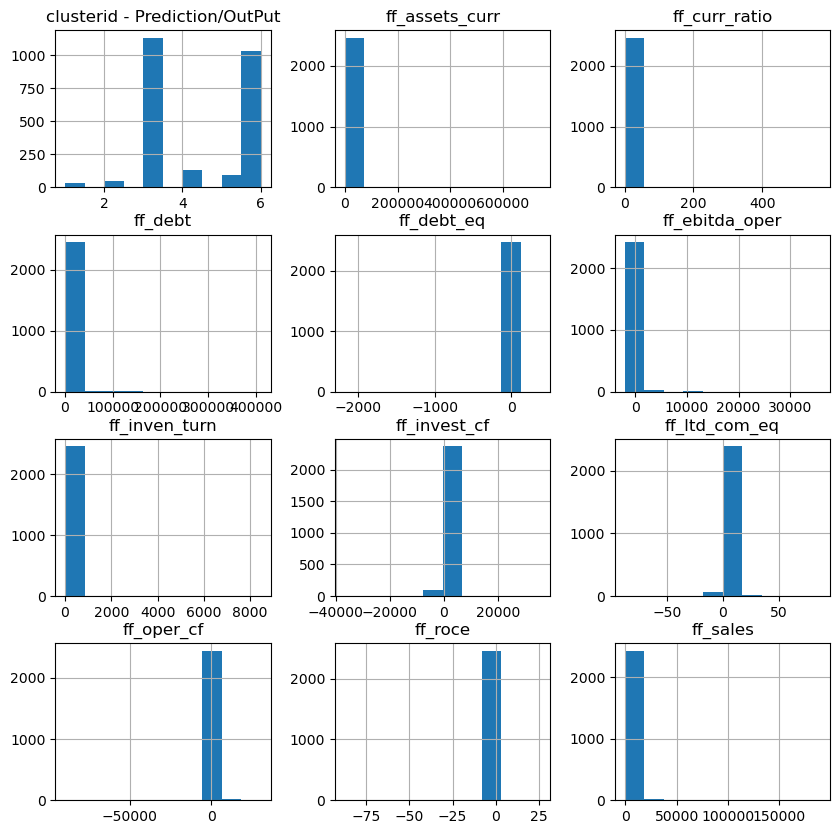


Box plots for outlier detection:


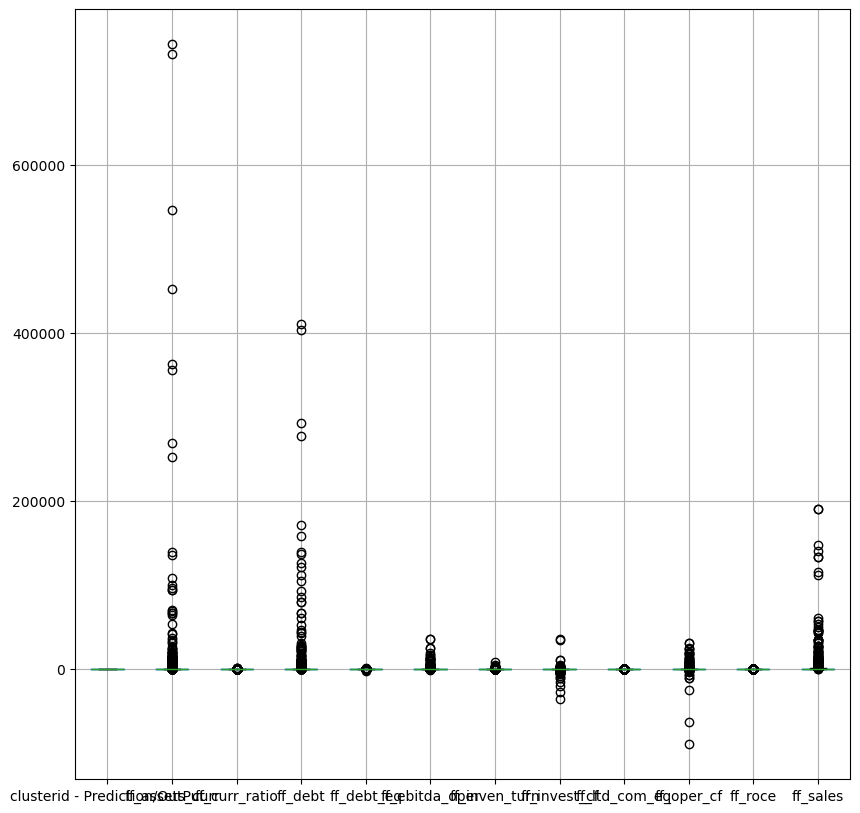


Class Distribution:
clusterid - Prediction/OutPut
3    1133
6    1036
4     130
5      96
2      49
1      32
Name: count, dtype: int64

Correlation between features:


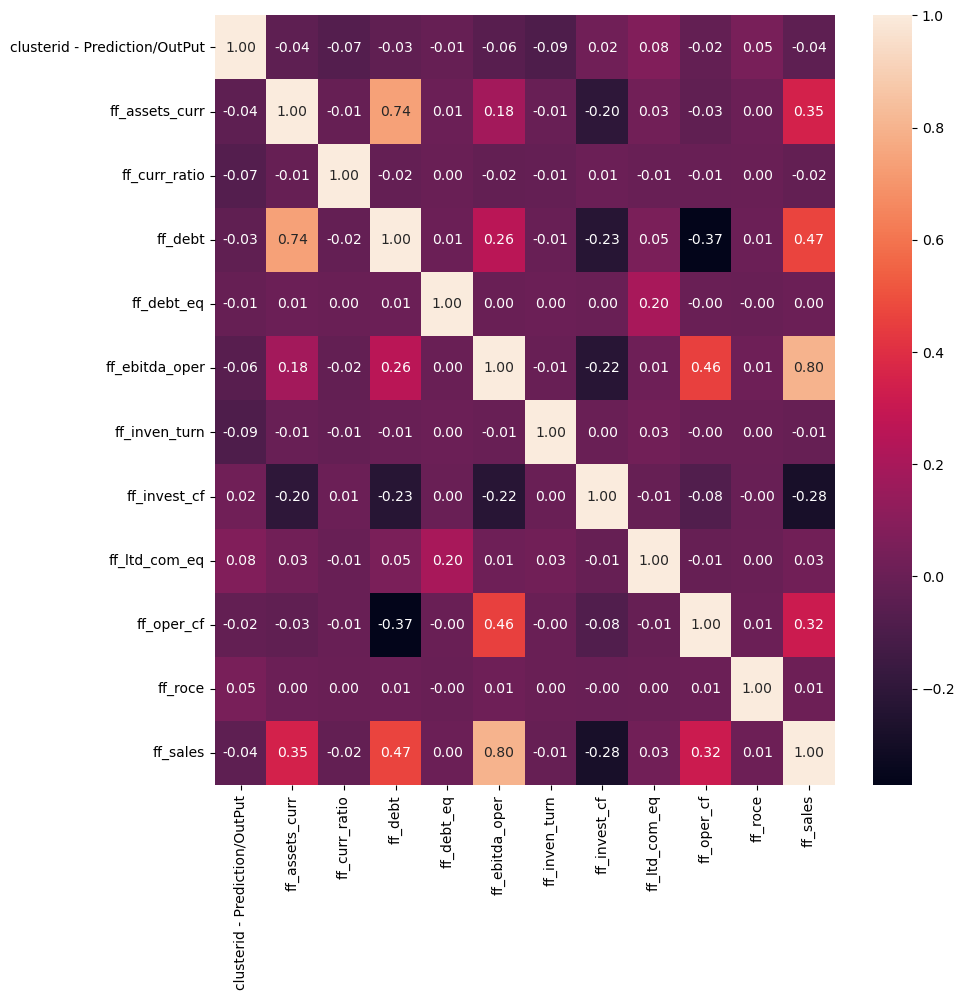


Outlier detection using Z-score:
Number of unique outliers: 113
Rows with outliers based on Z-score:
      clusterid - Prediction/OutPut companycode  ff_assets_curr  \
0                                 5    B03YJQ-R       11.213000   
1                                 5    B03YJQ-R       14.463000   
82                                4    BJ0WPB-R        3.241258   
106                               4    BV1CVQ-R        8.560000   
142                               2    C3B1CL-R        1.298807   
...                             ...         ...             ...   
2326                              4    WV082K-R      142.822000   
2328                              3    WVY4DX-R        2.928000   
2329                              4    WVY4DX-R        3.947000   
2364                              4    X55TYQ-R      225.227000   
2440                              3    XJQG0B-R        8.481000   

      ff_curr_ratio    ff_debt  ff_debt_eq  ff_ebitda_oper  ff_inven_turn  \
0          0.829

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('tab_data.csv')

# Basic Statistics
print("Basic Statistics:")
print(df.describe())

# Data Distribution
print("\nData Distribution:")
df.hist(figsize=(10,10))
plt.show()

# Box plots for outlier detection
print("\nBox plots for outlier detection:")
df.boxplot(figsize=(10,10))
plt.show()

# Class Distribution
print("\nClass Distribution:")
print(df['clusterid - Prediction/OutPut'].value_counts())

# Correlation between features
print("\nCorrelation between features:")
# Exclude non-numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Outlier detection using Z-score
print("\nOutlier detection using Z-score:")
z_scores = np.abs(stats.zscore(numeric_df))
threshold = 3
outliers = np.where(z_scores > threshold)
unique_outliers = np.unique(outliers[0])
print(f"Number of unique outliers: {len(unique_outliers)}")

# Display the rows with outliers
if len(unique_outliers) > 0:
    print("Rows with outliers based on Z-score:")
    print(df.iloc[unique_outliers])

# Save the cleaned data to a new CSV file
cleaned_file_path = 'Cleaned_data_1.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Basic Statistics:
       clusterid - Prediction/OutPut  ff_assets_curr  ff_curr_ratio  \
count                    2476.000000    2.476000e+03   2.476000e+03   
mean                        4.339661    1.233980e-16   9.183105e-17   
std                         1.500349    1.000202e+00   1.000202e+00   
min                         1.000000   -9.547630e-01  -1.980866e+00   
25%                         3.000000   -6.931656e-01  -5.837641e-01   
50%                         4.000000   -3.620173e-01  -6.580438e-02   
75%                         6.000000    3.243703e-01   3.496275e-01   
max                         6.000000    1.850674e+00   1.749715e+00   

            ff_debt    ff_debt_eq  ff_ebitda_oper  ff_inven_turn  \
count  2.476000e+03  2.476000e+03    2.476000e+03   2.476000e+03   
mean  -9.757049e-17  1.147888e-17   -6.313385e-17  -1.271286e-15   
std    1.000202e+00  1.000202e+00    1.000202e+00   1.000202e+00   
min   -6.819484e-01 -2.222208e+00   -2.119997e+00  -1.539513e+00   
25

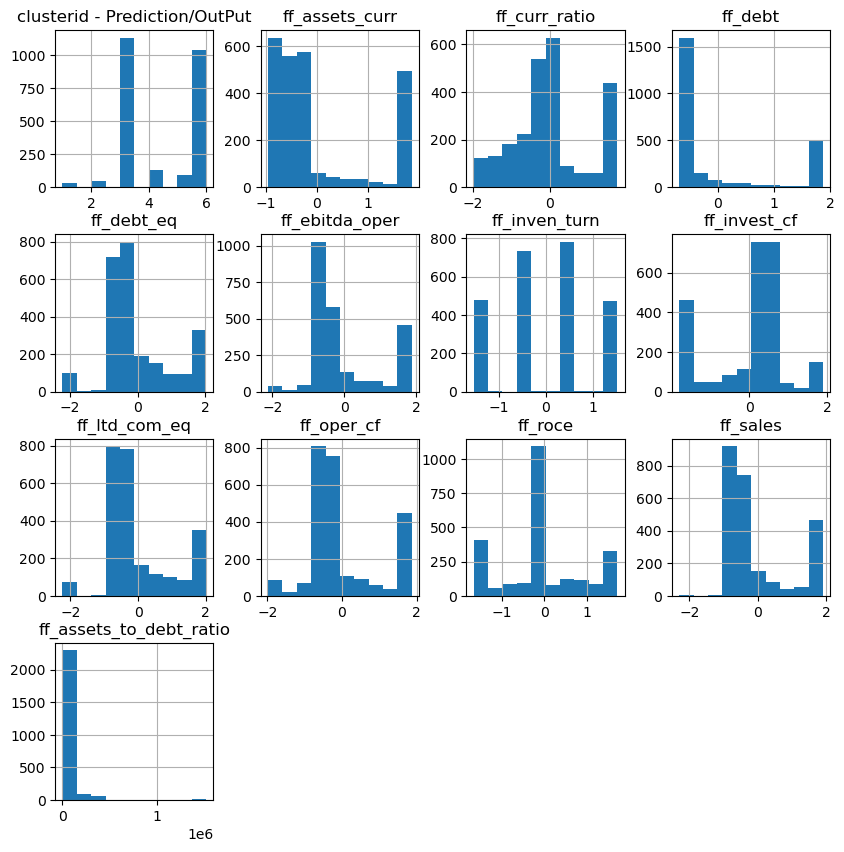


Box plots for outlier detection:


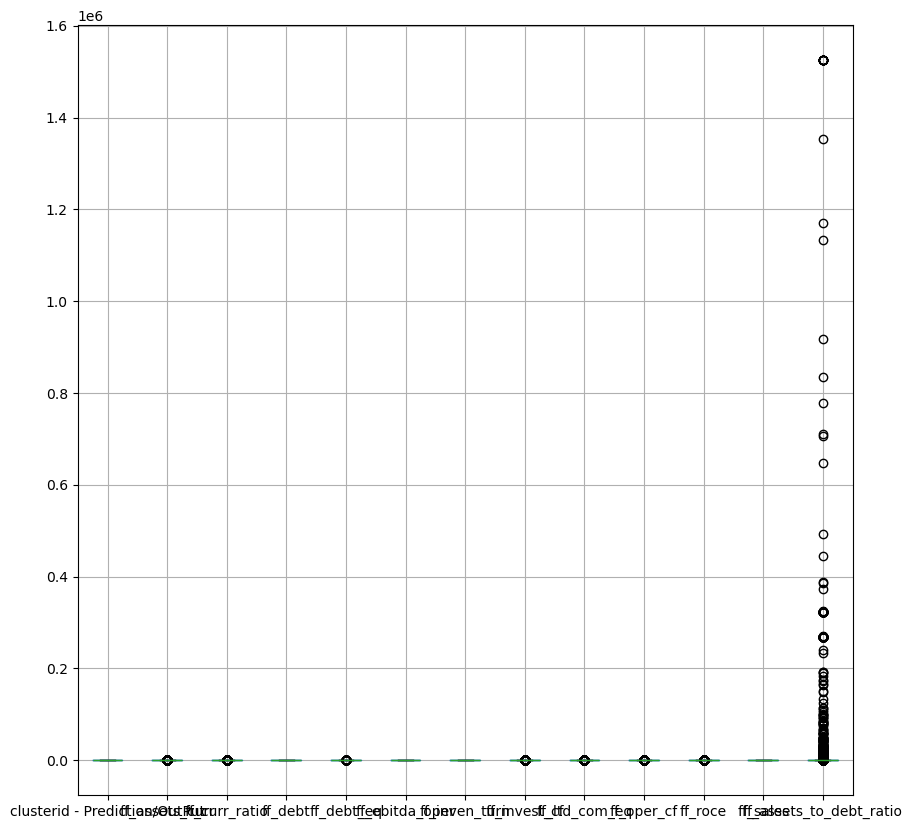


Class Distribution:
clusterid - Prediction/OutPut
3    1133
6    1036
4     130
5      96
2      49
1      32
Name: count, dtype: int64

Correlation between features:


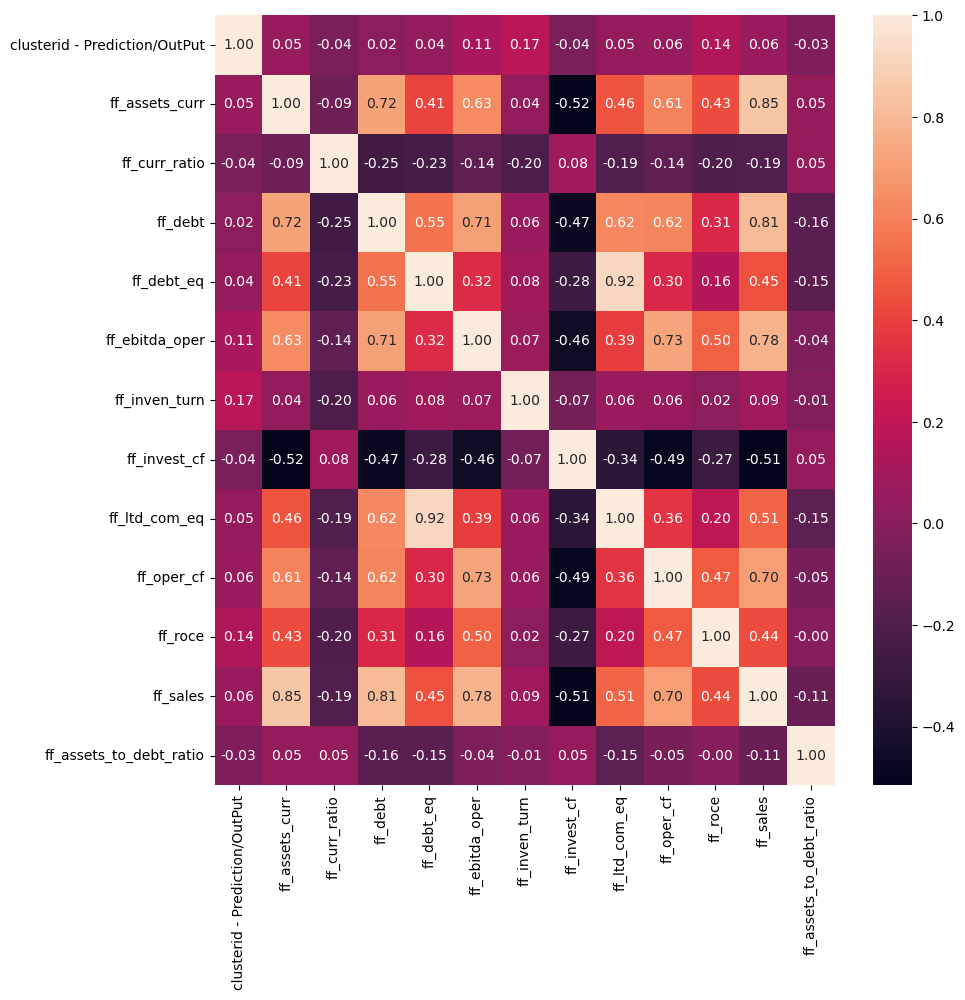


Outlier detection using Z-score:
Number of unique outliers: 22
Rows with outliers based on Z-score:
      clusterid - Prediction/OutPut companycode  ff_assets_curr  \
2                                 3    B04MZH-R        1.850674   
3                                 6    B04MZH-R        1.850674   
210                               3    CL0TNB-R        0.475030   
216                               3    CM0H43-R        1.850674   
217                               6    CM0H43-R        1.850674   
302                               3    D3ZF2L-R       -0.049098   
1092                              3    KW5GPS-R        1.850674   
1334                              3    MWL9WL-R        0.342652   
1439                              6    NRY83C-R        1.128878   
1456                              3    NYNL9S-R        1.533772   
1457                              6    NYNL9S-R        1.850674   
1550                              3    PX270B-R        0.353100   
1568                        

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('Case1.csv')

# Basic Statistics
print("Basic Statistics:")
print(df.describe())

# Data Distribution
print("\nData Distribution:")
df.hist(figsize=(10,10))
plt.show()

# Box plots for outlier detection
print("\nBox plots for outlier detection:")
df.boxplot(figsize=(10,10))
plt.show()

# Class Distribution
print("\nClass Distribution:")
print(df['clusterid - Prediction/OutPut'].value_counts())

# Correlation between features
print("\nCorrelation between features:")
# Exclude non-numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Outlier detection using Z-score
print("\nOutlier detection using Z-score:")
z_scores = np.abs(stats.zscore(numeric_df))
threshold = 3
outliers = np.where(z_scores > threshold)
unique_outliers = np.unique(outliers[0])
print(f"Number of unique outliers: {len(unique_outliers)}")

# Display the rows with outliers
if len(unique_outliers) > 0:
    print("Rows with outliers based on Z-score:")
    print(df.iloc[unique_outliers])

# Save the cleaned data to a new CSV file
cleaned_file_path = 'Cleaned_data_2.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


In [12]:
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv('tab_data.csv')

# Drop non-numeric or identifier columns if necessary
df = df.drop(columns=['companycode'])

# Handling outliers (simple method by removing extreme values)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = df[(df[col] >= df[col].quantile(0.01)) & (df[col] <= df[col].quantile(0.99))]

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['clusterid - Prediction/OutPut']))
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns[1:])

# Add the target variable back to the DataFrame
scaled_df['clusterid - Prediction/OutPut'] = df['clusterid - Prediction/OutPut'].values

# Split the data into features and target
X = scaled_df.drop(columns=['clusterid - Prediction/OutPut'])
y = scaled_df['clusterid - Prediction/OutPut']

# Addressing class imbalance with SMOTE
# Set the number of neighbors to 1, which is the minimum possible value
smote = SMOTE(k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# The data is now preprocessed and ready for model training


In [15]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target and 'companycode' is a non-feature column
X = df.drop(columns=['clusterid - Prediction/OutPut', 'companycode'])
y = df['clusterid - Prediction/OutPut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with the ANOVA F-value method
k_best_features = SelectKBest(score_func=f_classif, k='all')
k_best_features.fit_transform(X_train, y_train)
k_best_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best_features.scores_}).sort_values(by='Score', ascending=False)

# Feature selection using a RandomForestClassifier to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_}).sort_values(by='Importance', ascending=False)

# Combine both methods to decide on the final set of features
combined_features = k_best_scores.merge(rf_importances, on='Feature')
print(combined_features)

# Select features based on combined information or a specific threshold
selected_features = combined_features[combined_features['Score'] > threshold]  # Define your threshold

# Use the selected features for the final dataset
X_train_selected = X_train[selected_features['Feature'].values]
X_test_selected = X_test[selected_features['Feature'].values]

# Now X_train_selected and X_test_selected can be used for model training and testing


           Feature       Score  Importance
0   ff_ebitda_oper  125.998637    0.064139
1         ff_sales   92.128517    0.069200
2    ff_ltd_com_eq   78.845081    0.047071
3    ff_curr_ratio   68.937436    0.140628
4          ff_debt   42.365619    0.062420
5   ff_assets_curr   34.702667    0.117571
6    ff_inven_turn   29.522282    0.248000
7          ff_roce   26.641334    0.082535
8     ff_invest_cf   20.895155    0.049952
9       ff_oper_cf   13.191868    0.064045
10      ff_debt_eq    1.231498    0.054441


In [16]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target and 'companycode' is a non-feature column
X = df.drop(columns=['clusterid - Prediction/OutPut', 'companycode'])
y = df['clusterid - Prediction/OutPut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with the ANOVA F-value method
k_best_features = SelectKBest(score_func=f_classif, k='all')
k_best_features.fit_transform(X_train, y_train)
k_best_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best_features.scores_}).sort_values(by='Score', ascending=False)

# Feature selection using a RandomForestClassifier to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_}).sort_values(by='Importance', ascending=False)

# Combine both methods to decide on the final set of features
combined_features = k_best_scores.merge(rf_importances, on='Feature')
print(combined_features)

# Save the combined feature scores to a CSV file
output_file_path = 'output.csv'
combined_features.to_csv(output_file_path, index=False)
print(f"\nCombined feature scores saved to {output_file_path}")

# Select features based on combined information or a specific threshold
threshold = 0.5  # Define your threshold
selected_features = combined_features[combined_features['Score'] > threshold]

# Use the selected features for the final dataset
X_train_selected = X_train[selected_features['Feature'].values]
X_test_selected = X_test[selected_features['Feature'].values]

# Now X_train_selected and X_test_selected can be used for model training and testing


           Feature       Score  Importance
0   ff_ebitda_oper  125.998637    0.064139
1         ff_sales   92.128517    0.069200
2    ff_ltd_com_eq   78.845081    0.047071
3    ff_curr_ratio   68.937436    0.140628
4          ff_debt   42.365619    0.062420
5   ff_assets_curr   34.702667    0.117571
6    ff_inven_turn   29.522282    0.248000
7          ff_roce   26.641334    0.082535
8     ff_invest_cf   20.895155    0.049952
9       ff_oper_cf   13.191868    0.064045
10      ff_debt_eq    1.231498    0.054441

Combined feature scores saved to output.csv


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target variable
# and the rest of the columns are features
X = df.drop('clusterid - Prediction/OutPut', axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
# The test_size parameter determines the proportion of the test set
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have the training and testing sets:
# X_train: features for the training set
# X_test: features for the test set
# y_train: target variable for the training set
# y_test: target variable for the test set


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target variable
# and 'companycode' is a non-feature identifier column that should be dropped
X = df.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.17      0.22         6
           2       0.89      0.80      0.84        10
           3       0.70      0.86      0.77       211
           4       0.81      0.66      0.72        32
           5       0.74      0.61      0.67        23
           6       0.82      0.68      0.74       214

    accuracy                           0.75       496
   macro avg       0.71      0.63      0.66       496
weighted avg       0.76      0.75      0.75       496

Accuracy Score: 0.75


In [22]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:00:00:0100:01


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df = pd.read_csv('Cleaned_data_1.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target variable
# Adjust the class labels to start from 0
df['clusterid - Prediction/OutPut'] = df['clusterid - Prediction/OutPut'] - 1

# Assuming 'companycode' is a non-feature identifier column that should be dropped
X = df.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss')

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.73      0.80      0.76        10
           2       0.73      0.82      0.77       211
           3       0.92      0.75      0.83        32
           4       0.79      0.65      0.71        23
           5       0.79      0.74      0.76       214

    accuracy                           0.76       496
   macro avg       0.74      0.68      0.71       496
weighted avg       0.77      0.76      0.76       496

Accuracy Score: 0.7641129032258065


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the preprocessed data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target variable
X = df.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Load new data (the same preprocessing steps should be applied to this new data)
# new_data = pd.read_csv('new_data.csv')
# new_X = new_data.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)

# Make predictions on the new data
# new_predictions = rf_classifier.predict(new_X)

# The variable 'new_predictions' now contains the predicted classes for the new data


RandomForestClassifier(random_state=42)

In [26]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load the preprocessed data
df = pd.read_csv('Cleaned_data_1.csv')

# Adjust the class labels to start from 0
df['clusterid - Prediction/OutPut'] = df['clusterid - Prediction/OutPut'] - 1

# Assuming 'companycode' is a non-feature identifier column that should be dropped
X = df.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss')

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Load new data (the same preprocessing steps should be applied to this new data)
# new_data = pd.read_csv('new_data.csv')
# new_X = new_data.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)

# Make predictions on the new data
# new_predictions = xgb_classifier.predict(new_X)

# The variable 'new_predictions' now contains the predicted classes for the new data


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import joblib

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

# Save the best model
joblib.dump(best_model, 'best_xgb_model.joblib')

print(f"Best Parameters: {best_params}")
print(f"Test Accuracy of the Best Model: {test_accuracy}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50}
Test Accuracy of the Best Model: 0.7721774193548387


In [31]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    # Add more parameters here
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7641129032258065
Precision: 0.724276347645913
Recall: 0.61913238637008
F1 Score: 0.6583778405145634


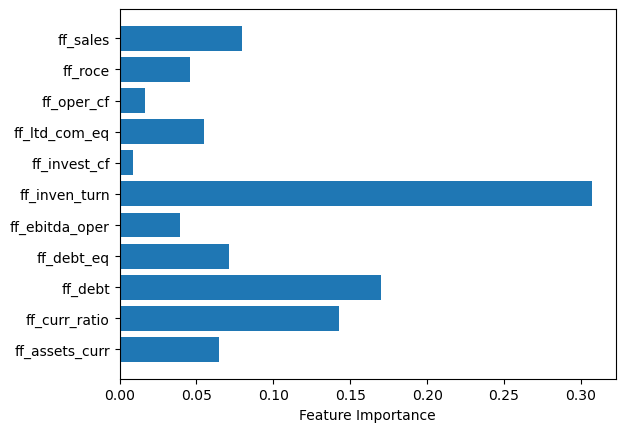

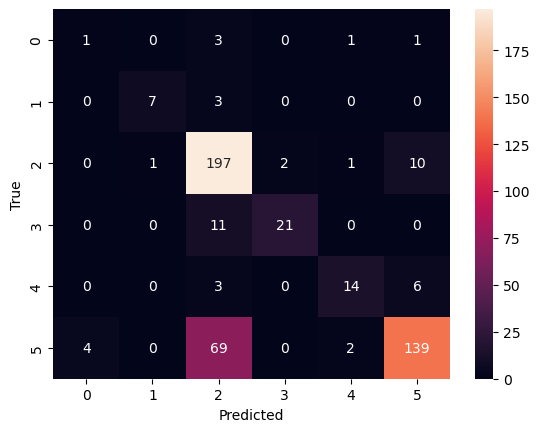

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot feature importances
feature_importances = best_model.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
!pip install shap --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.43.0
    Uninstalling shap-0.43.0:
      Successfully uninstalled shap-0.43.0


In [38]:
!pip install shap --upgrade


In [42]:
# Load the saved model (if not loaded during deployment)
xgb_model = joblib.load('best_xgb_model.joblib')

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.78      0.70      0.74        10
           2       0.71      0.90      0.80       211
           3       0.88      0.69      0.77        32
           4       0.74      0.61      0.67        23
           5       0.87      0.69      0.77       214

    accuracy                           0.77       496
   macro avg       0.72      0.65      0.68       496
weighted avg       0.79      0.77      0.77       496

Accuracy Score: 0.7721774193548387


Accuracy: 0.024193548387096774
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        10
           2       0.11      0.00      0.01       211
           3       0.03      0.25      0.05        32
           4       0.04      0.04      0.04        23
           5       0.11      0.01      0.02       214
           6       0.00      0.00      0.00         0

    accuracy                           0.02       496
   macro avg       0.04      0.04      0.02       496
weighted avg       0.10      0.02      0.02       496



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


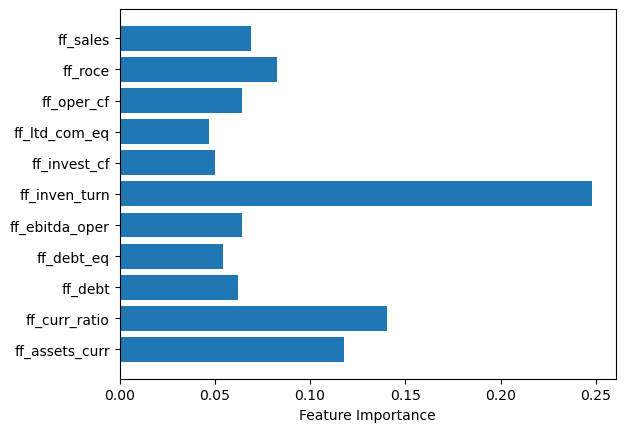

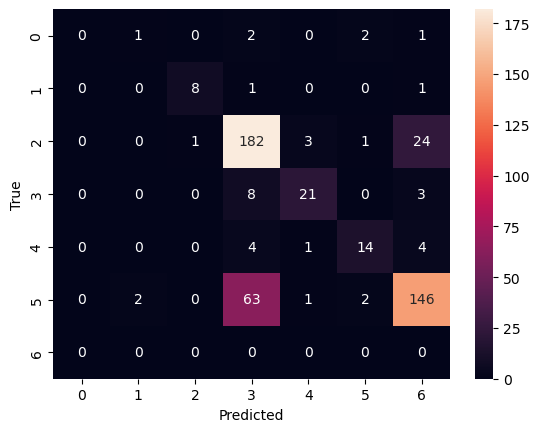

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = rf_classifier.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.75
              precision    recall  f1-score   support

           1       0.33      0.17      0.22         6
           2       0.89      0.80      0.84        10
           3       0.70      0.86      0.77       211
           4       0.81      0.66      0.72        32
           5       0.74      0.61      0.67        23
           6       0.82      0.68      0.74       214

    accuracy                           0.75       496
   macro avg       0.71      0.63      0.66       496
weighted avg       0.76      0.75      0.75       496



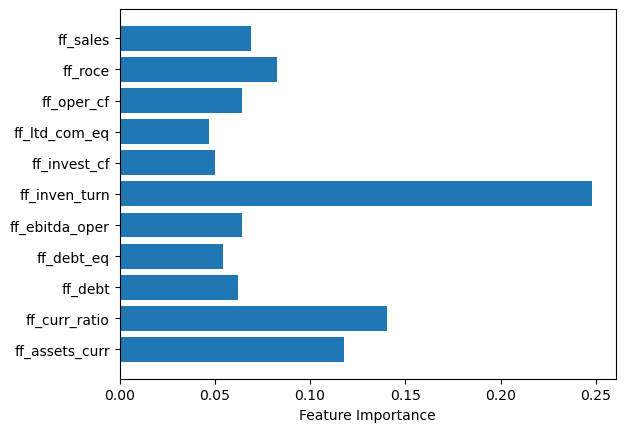

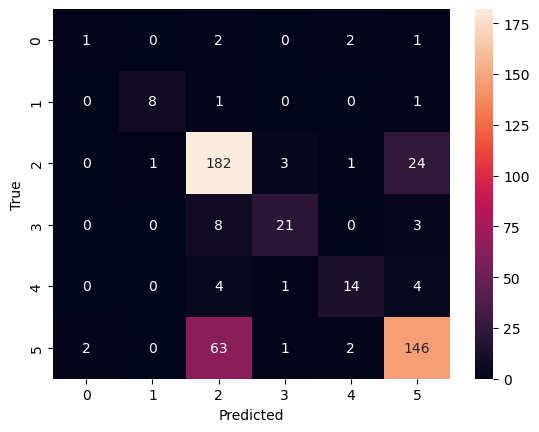

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target variable
X = df.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, zero_division=0))

# Feature Importance
feature_importances = rf_classifier.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages

# Load the preprocessed data
df = pd.read_csv('tab_data.csv')

# Assuming 'clusterid - Prediction/OutPut' is the target variable
X = df.drop(['clusterid - Prediction/OutPut', 'companycode'], axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

# Save the classification report to CSV
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report.csv')

# Feature Importance
feature_importances = rf_classifier.feature_importances_

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Save plots to a PDF
with PdfPages('model_outputs.pdf') as pdf:
    # Feature Importance Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=feature_importances, y=X.columns)
    plt.title('Feature Importances')
    plt.tight_layout()
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    pdf.savefig()
    plt.close()
